# Decision Tree Practice 
Date: 06/27/2025

[Data Set Link](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc)

In [23]:
# Bring in the data
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
path = kagglehub.dataset_download("vikramamin/bank-loan-approval-lr-dt-rf-and-auc")

file_name = os.listdir(path)[0]

df = pd.read_csv(os.path.join(path, file_name))

In [8]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


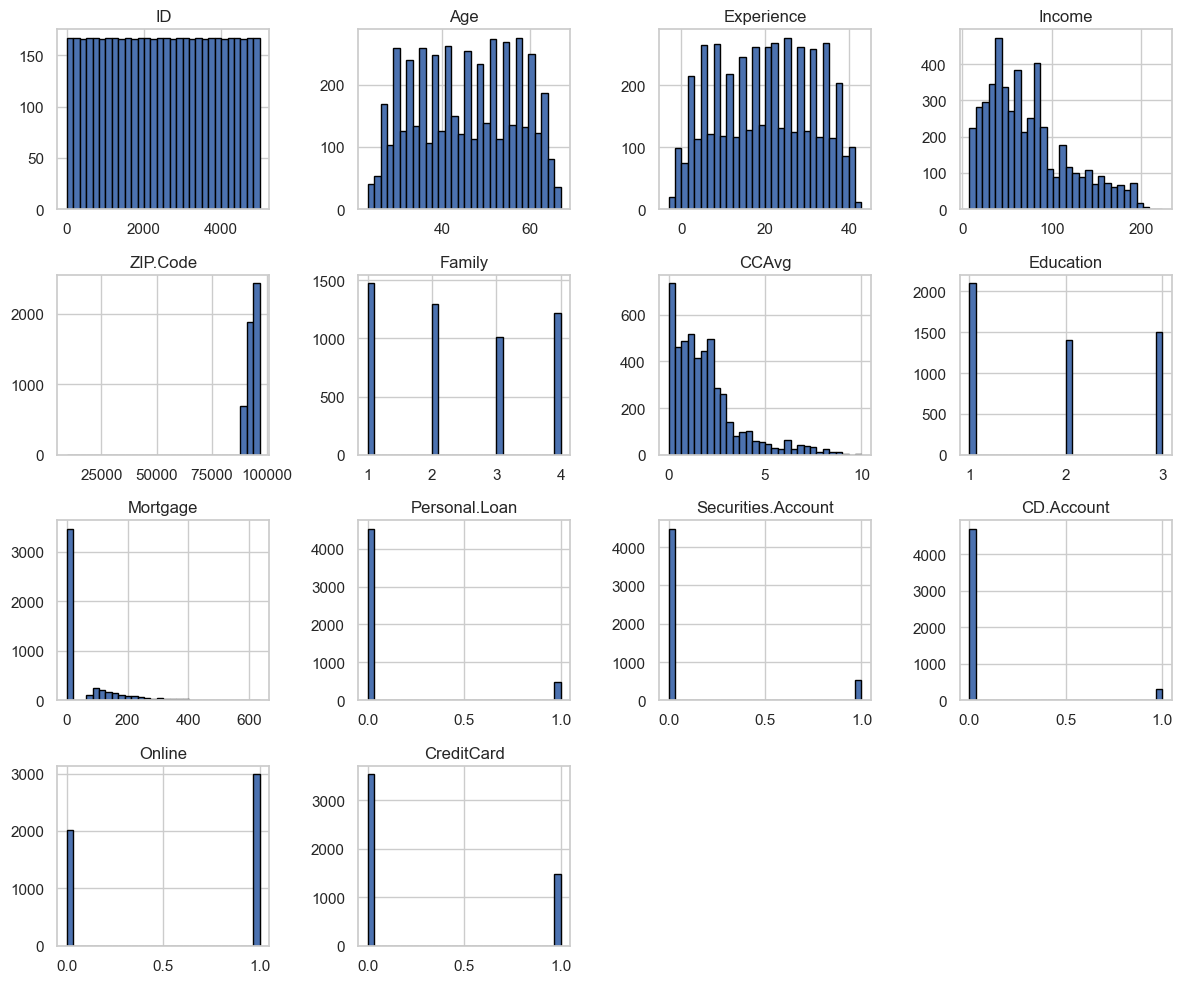

In [11]:
sns.set(style="whitegrid")

df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

Going to start decision 

In [13]:
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

# Set stratify to y to ensure that proportions are preserved for class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train size: {y_train.size}")
print(f"y_test size: {y_test.size}")

X_train shape: (4000, 13)
X_test shape: (1000, 13)
y_train size: 4000
y_test size: 1000


In [21]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

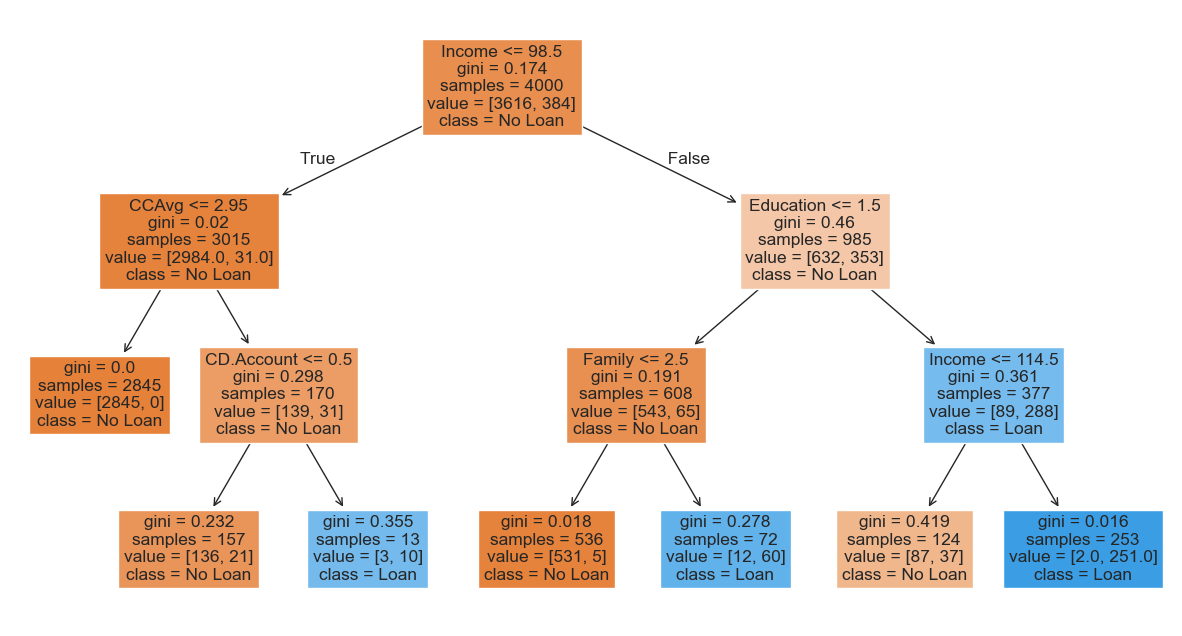

In [ ]:
plt.figure(figsize=(15, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['No Loan', 'Loan'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Noticing that the model does a bad job predicting Loan

Accuracy: 0.9810


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.88      0.93      0.90        96

    accuracy                           0.98      1000
   macro avg       0.94      0.96      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[892  12]
 [  7  89]]


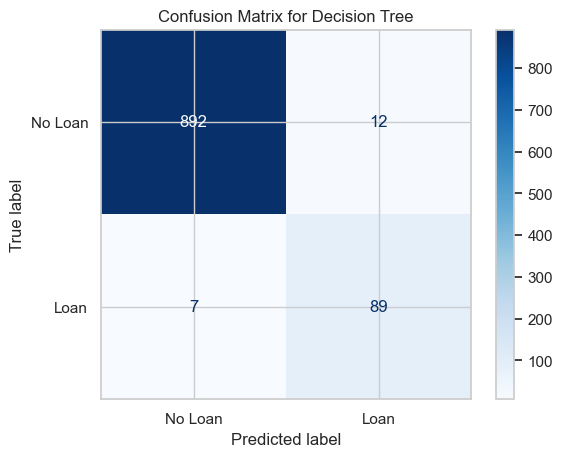

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Loan", "Loan"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

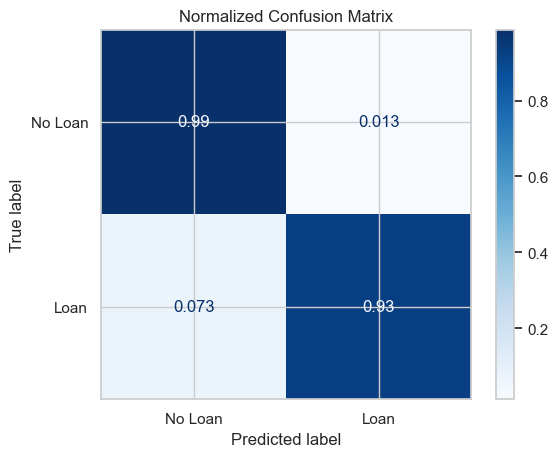

In [28]:
# we wil look at precision (higher emphasis on FP) here becausae we do not want to be giving loans to individuals that are unlikely to pay back the loan
disp = ConfusionMatrixDisplay.from_estimator(
    tree,
    X_test,
    y_test,
    display_labels=["No Loan", "Loan"],
    cmap=plt.cm.Blues,
    normalize="true"
)
plt.title("Normalized Confusion Matrix")
plt.show()